In [3]:
from importlib import reload
import pandas as pd
import numpy as np

from itertools import combinations, permutations

import pickle

import os
import glob
import sys
from pathlib import Path

import math
from scipy import stats
from scipy.interpolate import interp1d
from scipy.stats import sem

from scipy import signal
from scipy.signal import hilbert

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
from matplotlib.ticker import ScalarFormatter
import seaborn as sns

import lfp.lfp_analysis.LFP_collection as LFP_collection
import lfp.lfp_analysis.preprocessor as preprocessor
import lfp.lfp_analysis.connectivity_wrapper as connect
import lfp.lfp_analysis.plotting as lfplt
import lfp.lfp_analysis.event_extraction as ee

import spike.spike_analysis.firing_rate_calculations as fr
import spike.spike_analysis.spike_collection as collection
import spike.spike_analysis.spike_recording as recording
import spike.spike_analysis.single_cell as single_cell
import spike.spike_analysis.pca_trajectories as pca_trajectories


def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))

In [ ]:
object_spikes = unpickle_this('pilot2/object_control/object_spikes.pkl')
behavior_dict = unpickle_this('pilot2/object_control/object_behavior_dicts.pkl')
object_control_lfp_json = r"C:\Users\megha\UFL Dropbox\Meghan Cum\Padilla-Coreano Lab\2024\Cum_SocialMemEphys_pilot2\Object_Control (phase 7)\lfp_data\lfp_collection.json"

object_collection = LFP_collection.LFPCollection.load_collection(object_control_lfp_json)

In [ ]:
samp_freq = 1000
order = round(samp_freq)
if order % 2 != 0:  # Python uses % for modulo operation
    order = order - 1
print(order)

1000


In [ ]:
def calculate_phase_at_frequencies(signal_data, fs, freq_bands):
    """
    Calculate phase at different frequency bands using Hilbert transform
    
    Parameters:
    -----------
    signal_data : array
        Input time series data
    fs : float
        Sampling frequency in Hz
    freq_bands : list of tuples
        List of (low_freq, high_freq) defining frequency bands of interest
        
    Returns:
    --------
    phases : dict
        Dictionary with frequency bands as keys and phase arrays as values
    """
    phases = {}
    
    for low_freq, high_freq in freq_bands:
        # Design a bandpass filter
        nyquist = fs / 2
        low = low_freq / nyquist
        high = high_freq / nyquist
        b, a = signal.butter(2, [low_freq, high_freq], fs = fs, btype='bandpass')
        
        # Apply the filter
        filtered_signal = signal.filtfilt(b, a, x=signal_data)
        
        # Apply Hilbert transform to get analytic signal
        analytic_signal = hilbert(filtered_signal)
        
        # Extract instantaneous phase
        instantaneous_phase = np.angle(analytic_signal)
        
        # Store in dictionary
        band_name = f"{low_freq}-{high_freq}Hz"
        phases[band_name] = instantaneous_phase
    
    return phases



In [ ]:
print(behavior_dict.keys())

new_behavior_dict = {}
subject_dict = {}
for rec, data in behavior_dict.items():
    new_key = rec.split('_')[0] + '_' + rec.split('_')[1] + '_merged.rec'
    new_key = new_key.lower()
    new_behavior_dict[new_key] = data
    subject_dict[new_key] = str(int(rec.split('_')[0]) / 10)
print(subject_dict)

dict_keys(['22_object_CTBN.csv', '23_object_TBCN.csv', '31_object_BNTC.csv', '32_object_NBTC.csv', '41_object_BCNT.csv', '44_Object_TCNB.csv'])
{'22_object_merged.rec': '2.2', '23_object_merged.rec': '2.3', '31_object_merged.rec': '3.1', '32_object_merged.rec': '3.2', '41_object_merged.rec': '4.1', '44_object_merged.rec': '4.4'}


In [ ]:
for recording, beh_dict in behavior_dict.items():
    filename = recording.split('_')[0]
    for recording in object_collection.recordings:
        if recording.name.split('_')[0] == filename:
            recording.set_event_dict(beh_dict)

novel mouse
novel mouse
novel mouse
novel mouse


c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\event_extraction.py:114: RuntimeWarning: Mean of empty slice
  event_snippet = np.nanmean(event_snippet, axis=0)


novel mouse
novel mouse
novel mouse
novel mouse
novel mouse
novel mouse
novel mouse
novel mouse
familiar mouse
familiar mouse
familiar mouse
familiar mouse
familiar mouse
familiar mouse
familiar mouse
familiar mouse
familiar mouse
familiar mouse
familiar mouse
familiar mouse


c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\plotting.py:77: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(np.array(averages), axis=0)


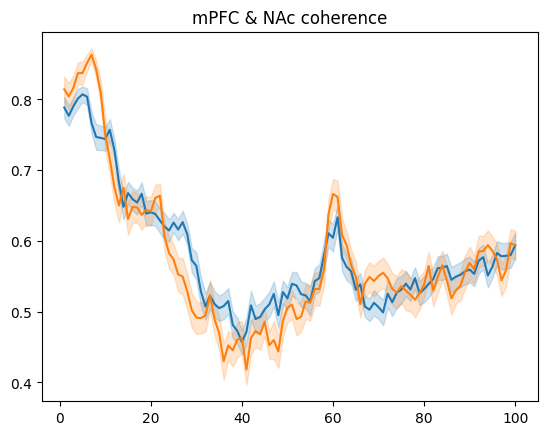

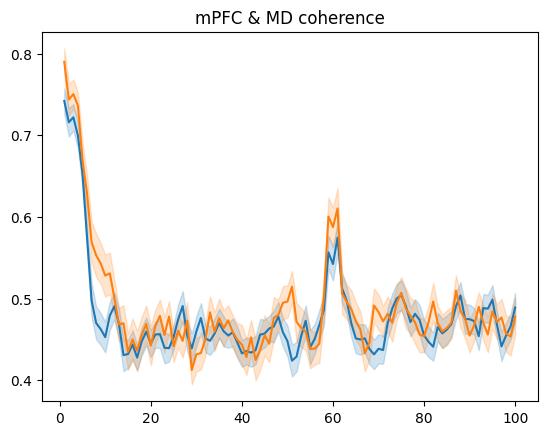

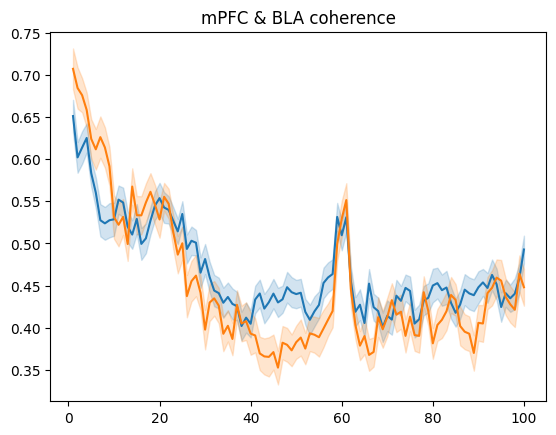

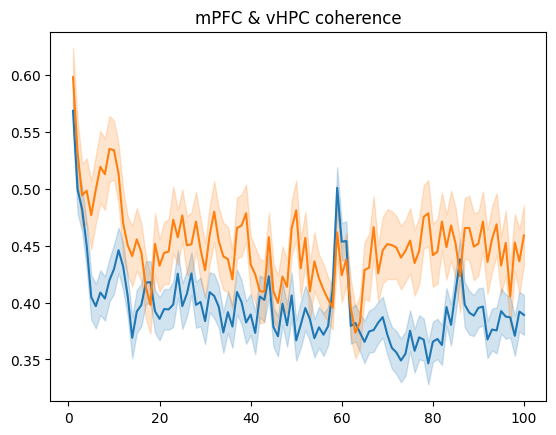

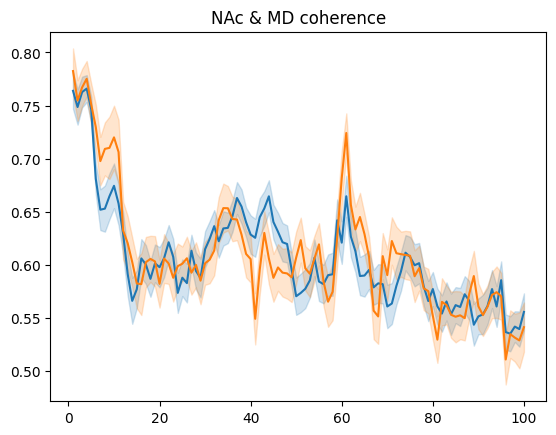

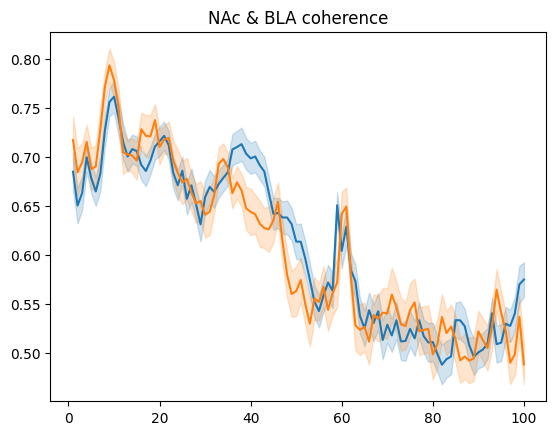

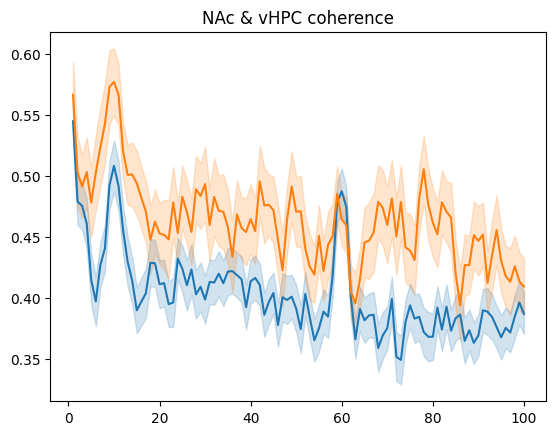

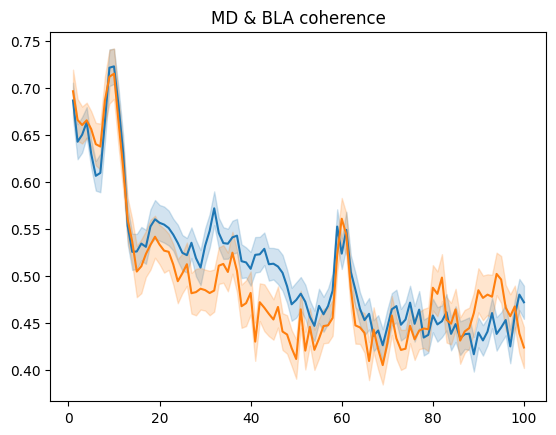

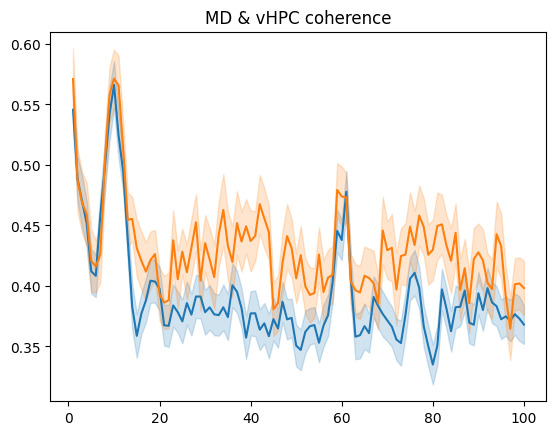

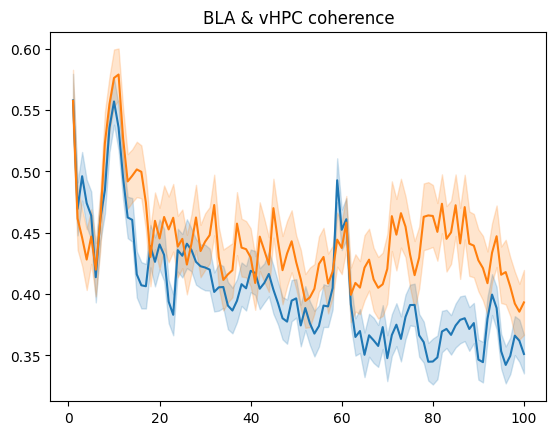

In [ ]:
reload(lfplt)
reload(ee)
averages = lfplt.average_events(object_collection, events = ['novel mouse', 'familiar mouse'], mode = 'coherence')
lfplt.plot_coherence_spectrum(object_collection, averages)

(1810627,)


{'4-12Hz': array([-1.0079098 , -0.74129774, -0.72001751, ..., -1.58777076,
        -1.58210018, -1.57484699]),
 '12-30Hz': array([ 0.13251539, -0.10835356, -0.11746618, ...,  0.38886575,
         0.41882616,  0.399858  ]),
 '30-59Hz': array([-2.18432964, -1.90730752, -1.60792603, ...,  3.03114907,
        -2.9460189 , -2.57647419]),
 '59-80Hz': array([-0.79034545, -0.47694067, -0.03940818, ..., -0.99828934,
        -0.77427535, -0.63565146])}

In [ ]:
def generate_sine_wave(freq=1, amplitude=1, duration=1000, sample_rate=1000):
    """
    Generate a sine wave
    
    Parameters:
    freq: frequency of the sine wave in Hz
    amplitude: peak amplitude of the sine wave
    duration: length of the signal in seconds
    sample_rate: sampling frequency in Hz
    """
    # Create time array
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    
    # Generate sine wave
    sine_wave = amplitude * np.sin(2 * np.pi * freq * t)
    
    return t, sine_wave

t, sine_wave = generate_sine_wave(freq=4)

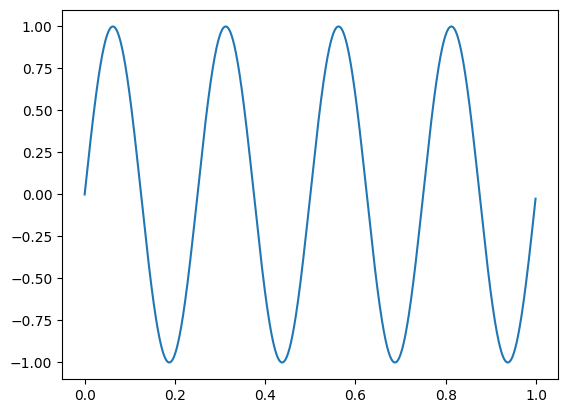

In [ ]:
plt.plot(t[0:1000], sine_wave[0:1000])

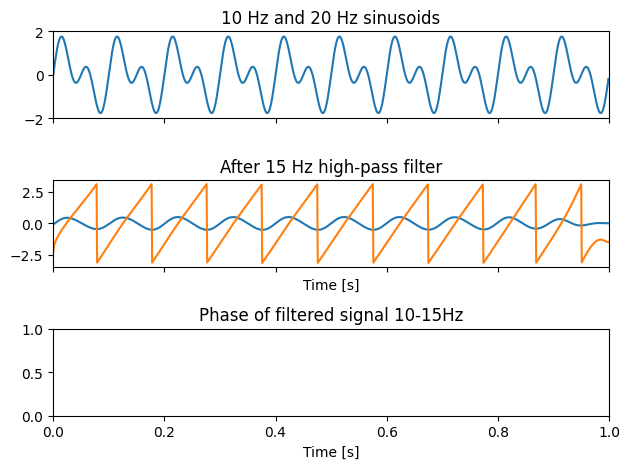

In [ ]:

t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])

b, a = signal.butter(2, [10, 15], fs = 1000, btype='bandpass')
filtered = signal.filtfilt(b, a, x=sig)
ax2.plot(t, filtered)

ax2.set_title('After 15 Hz high-pass filter')
#ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [s]')
phase_dict = calculate_phase_at_frequencies(sig, 1000, [(10,15)])
ax2.plot(t, phase_dict['10-15Hz'])

ax3.set_title('Phase of filtered signal 10-15Hz')
ax3.set_xlabel('Time [s]')
plt.tight_layout()
plt.show()



(1000,)
1000


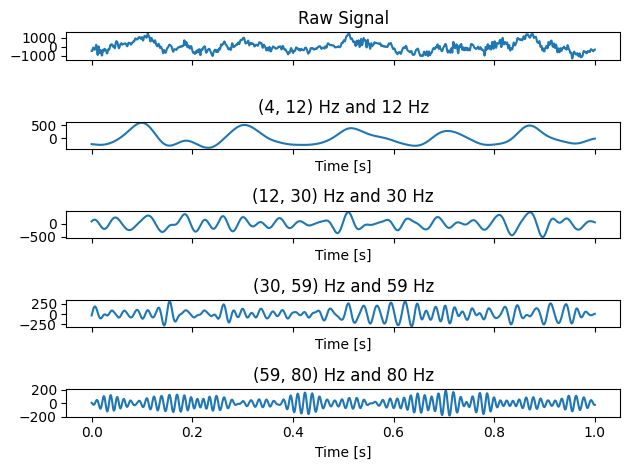

In [ ]:
sig = object_collection.recordings[0].traces[1000:2000,0]
print(sig.shape) # 1 second of data
freqs = [(4,12), (12,30), (30,59), (59,80)]

t = np.linspace(0,sig.shape[0]/1000,sig.shape[0])
print(len(t)) # 1 second
filter_sigs = []
for (low_freq, high_freq) in freqs:
    b, a = signal.butter(2, [low_freq, high_freq], fs = 1000, btype='bandpass')
    filtered = signal.filtfilt(b, a, x=sig)
    filter_sigs.append(filtered)
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, 1, sharex=True)
ax0.plot(t, sig)
ax0.set_title('Raw Signal')
ax1.plot(t, filter_sigs[0])
ax1.set_title(f'{freqs[0]} Hz and {freqs[0][1]} Hz')
ax1.set_xlabel('Time [s]')
ax2.plot(t, filter_sigs[1])
ax2.set_title(f'{freqs[1]} Hz and {freqs[1][1]} Hz')
ax2.set_xlabel('Time [s]')
ax3.plot(t, filter_sigs[2])
ax3.set_title(f'{freqs[2]} Hz and {freqs[2][1]} Hz')
ax3.set_xlabel('Time [s]')
ax4.plot(t, filter_sigs[3])
ax4.set_title(f'{freqs[3]} Hz and {freqs[3][1]} Hz')
ax4.set_xlabel('Time [s]')
plt.tight_layout()
plt.show()

In [ ]:
test_traces = object_collection.recordings[0].traces[:,0]



In [38]:
rec_phase_dict = {}
for recording in object_collection.recordings:
    region_dict = {}
    for region in range(recording.traces.shape[1]):
        traces = recording.traces[:,region]
        phase_dict = calculate_phase_at_frequencies(traces, 1000, [(4,12), (12,30), (30,59), (59,80)])
        region_dict[recording.brain_region_dict.inverse[region]] = phase_dict
    rec_phase_dict[recording.name] = region_dict


In [43]:
print(rec_phase_dict['22_object_merged.rec']['mPFC'].keys())

dict_keys(['4-12Hz', '12-30Hz', '30-59Hz', '59-80Hz'])


In [4]:
object_spikes.analyze(timebin=1)

All set to analyze


In [ ]:
hz_to_timebin = int(sampling_rate * 0.001 * timebin) #20000*.001 = 
bins = np.arange(1, last_timestamp + 2, hz_to_timebin)
spiketrain = np.histogram(timestamp_array, bins=bins)[0]


In [ ]:
timestamp_array = test_rec.timestamps_var.copy()
timestamp_array_new = np.insert(timestamp_array, 0, 1)
timestamp_array_new = np.insert(timestamp_array_new, 1, 20)

In [ ]:
bins = np.arange(1, 36212348, 20)
print(bins[0:10])
spiketrain = np.histogram(timestamp_array_new, bins=bins)[0]
print(spiketrain[0:20])
print(timestamp_array_new[0:10])

[  1  21  41  61  81 101 121 141 161 181]
[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[   1   20  306 1409 1533 1622 1828 1907 2780 3080]


In [10]:

test_spikes = object_spikes.recordings[0].spiketrain
test_rec = object_spikes.recordings[0]
print(test_spikes.shape)
print(test_traces.shape)
print(object_spikes.timebin)
print(test_rec.timestamps_var[0], test_rec.timestamps_var[-1])
print(test_rec.timestamps_var[-1]/20)
print(test_rec.timestamps_var[0:10]/20)
print(test_spikes[0:100])
print(test_spikes[0:16])

(1810617,)
(1810627,)
1
306 36212348
1810617.4
[ 15.3   70.45  76.65  81.1   91.4   95.35 139.   154.   170.45 200.2 ]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [5]:
behavior_dfs = {}
path = r"C:\Users\megha\Documents\Padilla-Coreano\homecage_social_ephys_vids\pilot2\boris\object\aggregated_csvs"
for file in os.listdir(path):
    if file.endswith(".csv"):
        behavior_dfs[file] = pd.read_csv(os.path.join(path, file))


In [ ]:
df

,Observation id,Observation date,Description,Observation type,Source,Time offset (s),Coding duration,Media duration (s),FPS (frame/s),Subject,...,Start (s),Stop (s),Duration (s),Media file name,Image index start,Image index stop,Image file path start,Image file path stop,Comment start,Comment stop
0,phase7_22_object_converted,2025-03-06 14:35:39.709,NaN,Media file,player #1:22_object_converted.mp4,0.0,1208.4,1810.667,15.0,subject,...,601.200,601.200,NaN,22_object_converted.mp4,9018,9018.0,NaN,NaN,NaN,NaN
1,phase7_22_object_converted,2025-03-06 14:35:39.709,NaN,Media file,player #1:22_object_converted.mp4,0.0,1208.4,1810.667,15.0,social_agent,...,601.400,601.667,0.267,22_object_converted.mp4,9021,9025.0,NaN,NaN,NaN,NaN
2,phase7_22_object_converted,2025-03-06 14:35:39.709,NaN,Media file,player #1:22_object_converted.mp4,0.0,1208.4,1810.667,15.0,subject,...,602.200,603.467,1.267,22_object_converted.mp4,9033,9052.0,NaN,NaN,NaN,NaN
3,phase7_22_object_converted,2025-03-06 14:35:39.709,NaN,Media file,player #1:22_object_converted.mp4,0.0,1208.4,1810.667,15.0,subject,...,605.400,606.399,0.999,22_object_converted.mp4,9081,NaN,NaN,NaN,NaN,NaN
4,phase7_22_object_converted,2025-03-06 14:35:39.709,NaN,Media file,player #1:22_object_converted.mp4,0.0,1208.4,1810.667,15.0,subject,...,606.400,607.400,1.000,22_object_converted.mp4,9096,9111.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,phase7_22_object_converted,2025-03-06 14:35:39.709,NaN,Media file,player #1:22_object_converted.mp4,0.0,1208.4,1810.667,15.0,subject,...,1785.933,1786.599,0.666,22_object_converted.mp4,26789,NaN,NaN,NaN,NaN,NaN
219,phase7_22_object_converted,2025-03-06 14:35:39.709,NaN,Media file,player #1:22_object_converted.mp4,0.0,1208.4,1810.667,15.0,subject,...,1786.600,1786.733,0.133,22_object_converted.mp4,26799,26801.0,NaN,NaN,NaN,NaN
220,phase7_22_object_converted,2025-03-06 14:35:39.709,NaN,Media file,player #1:22_object_converted.mp4,0.0,1208.4,1810.667,15.0,subject,...,1792.000,1792.400,0.400,22_object_converted.mp4,26880,26886.0,NaN,NaN,NaN,NaN
221,phase7_22_object_converted,2025-03-06 14:35:39.709,NaN,Media file,player #1:22_object_converted.mp4,0.0,1208.4,1810.667,15.0,subject,...,1808.467,1809.199,0.732,22_object_converted.mp4,27127,NaN,NaN,NaN,NaN,NaN


In [36]:
behavior_dfs['41_object_BCNT.csv']

,Observation id,Observation date,Description,Media file,Total length,FPS,Subject,Behavior,Behavioral category,Modifiers,Behavior type,Start (s),Stop (s),Duration (s),Comment start,Comment stop
0,41_object_BCNT,2025-03-09 15:44:54,NaN,/Volumes/LAB WORK/Research Lab/BORIS/Mar 7/41_...,3661.46,15.0,subject,mice back in,NaN,NaN,POINT,610.705,610.705,NaN,NaN,NaN
1,41_object_BCNT,2025-03-09 15:44:54,NaN,/Volumes/LAB WORK/Research Lab/BORIS/Mar 7/41_...,3661.46,15.0,subject,sniffing object,NaN,NaN,STATE,611.455,614.202,2.747,NaN,NaN
2,41_object_BCNT,2025-03-09 15:44:54,NaN,/Volumes/LAB WORK/Research Lab/BORIS/Mar 7/41_...,3661.46,15.0,subject,sniffing object,NaN,NaN,STATE,614.704,617.455,2.751,NaN,NaN
3,41_object_BCNT,2025-03-09 15:44:54,NaN,/Volumes/LAB WORK/Research Lab/BORIS/Mar 7/41_...,3661.46,15.0,subject,sniffing object,NaN,NaN,STATE,618.955,619.703,0.748,NaN,NaN
4,41_object_BCNT,2025-03-09 15:44:54,NaN,/Volumes/LAB WORK/Research Lab/BORIS/Mar 7/41_...,3661.46,15.0,subject,sniffing object,NaN,NaN,STATE,622.452,623.705,1.253,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,41_object_BCNT,2025-03-09 15:44:54,NaN,/Volumes/LAB WORK/Research Lab/BORIS/Mar 7/41_...,3661.46,15.0,subject,sniffing object,NaN,NaN,STATE,1734.102,1737.105,3.003,NaN,NaN
147,41_object_BCNT,2025-03-09 15:44:54,NaN,/Volumes/LAB WORK/Research Lab/BORIS/Mar 7/41_...,3661.46,15.0,subject,sniffing object,NaN,NaN,STATE,1739.355,1740.604,1.249,NaN,NaN
148,41_object_BCNT,2025-03-09 15:44:54,NaN,/Volumes/LAB WORK/Research Lab/BORIS/Mar 7/41_...,3661.46,15.0,subject,sniffing object,NaN,NaN,STATE,1744.354,1746.356,2.002,NaN,NaN
149,41_object_BCNT,2025-03-09 15:44:54,NaN,/Volumes/LAB WORK/Research Lab/BORIS/Mar 7/41_...,3661.46,15.0,subject,sniffing object,NaN,NaN,STATE,1762.605,1763.856,1.251,NaN,NaN


In [53]:
collection_seg_dict = {}
for filename, df in behavior_dfs.items():
    seg_dict = {}
    mouse_in = list(df[df['Behavior'] == 'mice back in']['Start (s)'])
    mouse_out = list(df[df['Behavior'] == 'mice taken out']['Start (s)'])
    try:
        media_duration = float(df['Media duration (s)'].unique())
    except KeyError:
        media_duration = np.nan
    if filename == '23_object_TBCN.csv':
        mouse_in.insert(0, 602)
        mouse_out.insert(0, 900)
        mouse_in.insert(1, 902)
        mouse_out.insert(1, 1201)
    if filename == '32_object_NBTC.csv': 
        mouse_in.insert(1, 922)
        mouse_in.insert(2, 1222)
        mouse_out.insert(1, 1222)
        mouse_out.insert(2,1521)
    if filename == '31_object_BNTC.csv':
        mouse_in.insert(0, 608)
        mouse_in.insert(2, 1213)
        mouse_out.insert(0, 906)
        mouse_out.insert(2,1521)
    print(media_duration)
    seg_1 = np.array([mouse_in[0], mouse_out[0]]) * 1000
    seg_2 = np.array([mouse_in[1], mouse_out[1]])*1000
    seg_3 = np.array([mouse_in[2], mouse_out[2]])*1000
    seg_4 = np.array([mouse_in[3], media_duration])*1000
    seg_0 = np.array([0, mouse_in[0]])*1000

    segs= [seg_1, seg_2, seg_3, seg_4]
    seg_dict = {}
    order_dict = {'T': 'novel object', 'B': 'familiar object', 'N': 'novel mouse', 'C': 'familiar mouse'}
    order = filename.split("_")[-1].split(".")[0]
    for i in range(len(order)):
        seg_dict[f'{order_dict[order[i]]}'] = segs[i]
    seg_dict['baseline'] = seg_0
    new_name = (filename.split("_")[0] + "_" + filename.split("_")[1] + "_merged.rec").lower()
    collection_seg_dict[new_name] = seg_dict

1810.667
1830.6
1830.867
1831.0
nan
1810.667


C:\Users\megha\AppData\Local\Temp\ipykernel_4784\1578292232.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  media_duration = float(df['Media duration (s)'].unique())


In [ ]:
 df_1 = df[df['Start (s)'] < mouse_out[0]]
    df_2 = df[(df['Start (s)'] > mouse_in[1]) &
            (df['Start (s)'] < mouse_out[1])]
    df_3 = df[(df['Start (s)'] > mouse_in[2]) &
            (df['Start (s)'] < mouse_out[2])]
    df_4 = df[(df['Start (s)'] > mouse_in[3])]

In [ ]:
type(test_spikes)
seg_1[0]

601200.0

In [ ]:
test_rec.unit_spiketrains.keys()

dict_keys(['64', '50', '8', '37', '63', '27', '19', '24', '59', '29', '32', '58', '16'])

In [ ]:
unit_test = test_rec.unit_spiketrains['64']
unit_test 

In [29]:
object_collection.analyze(timebin = 1)

AttributeError: 'LFPCollection' object has no attribute 'analyze'

In [44]:
events

NameError: name 'events' is not defined

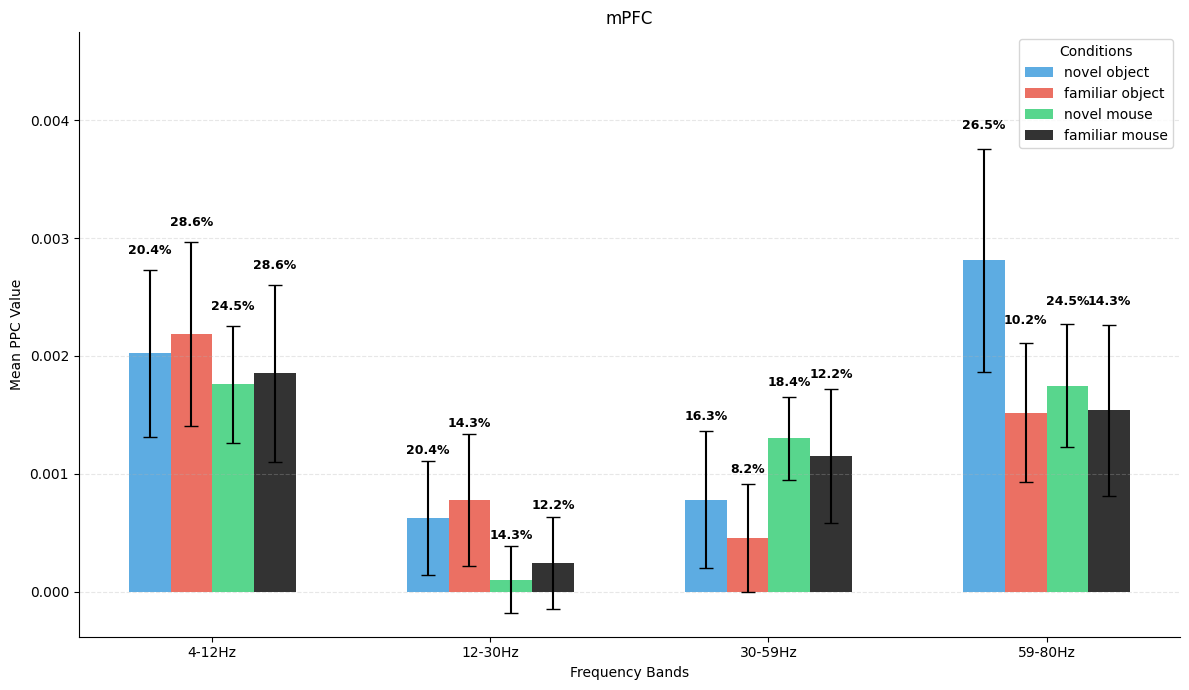

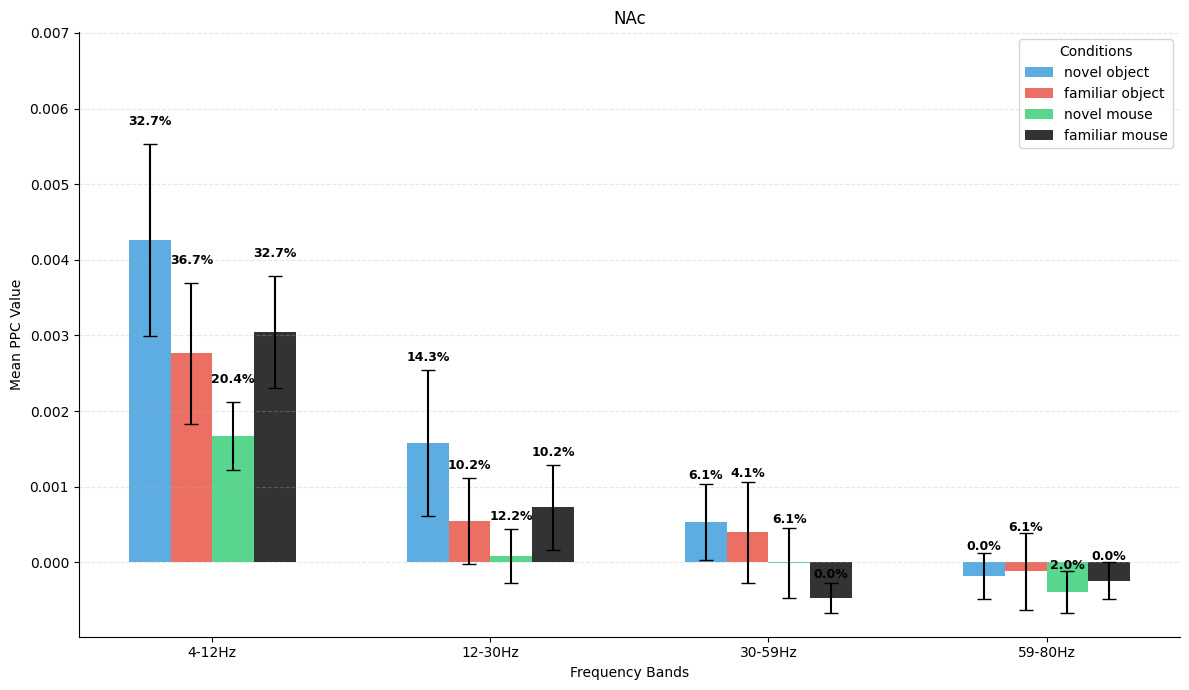

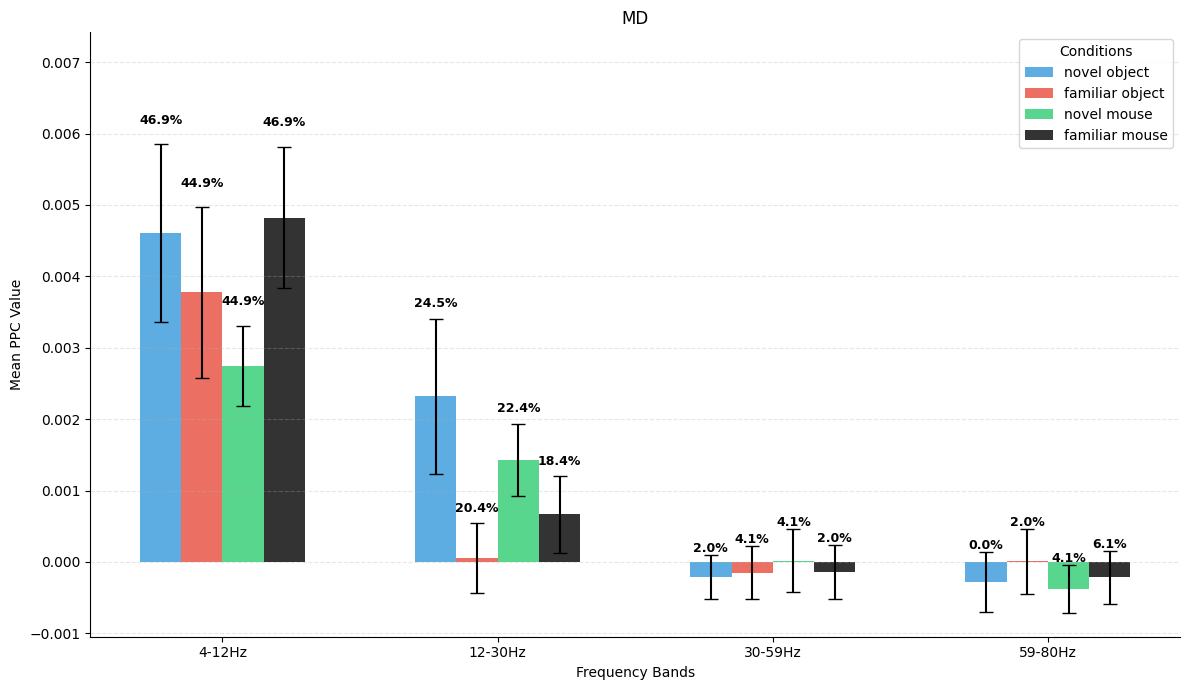

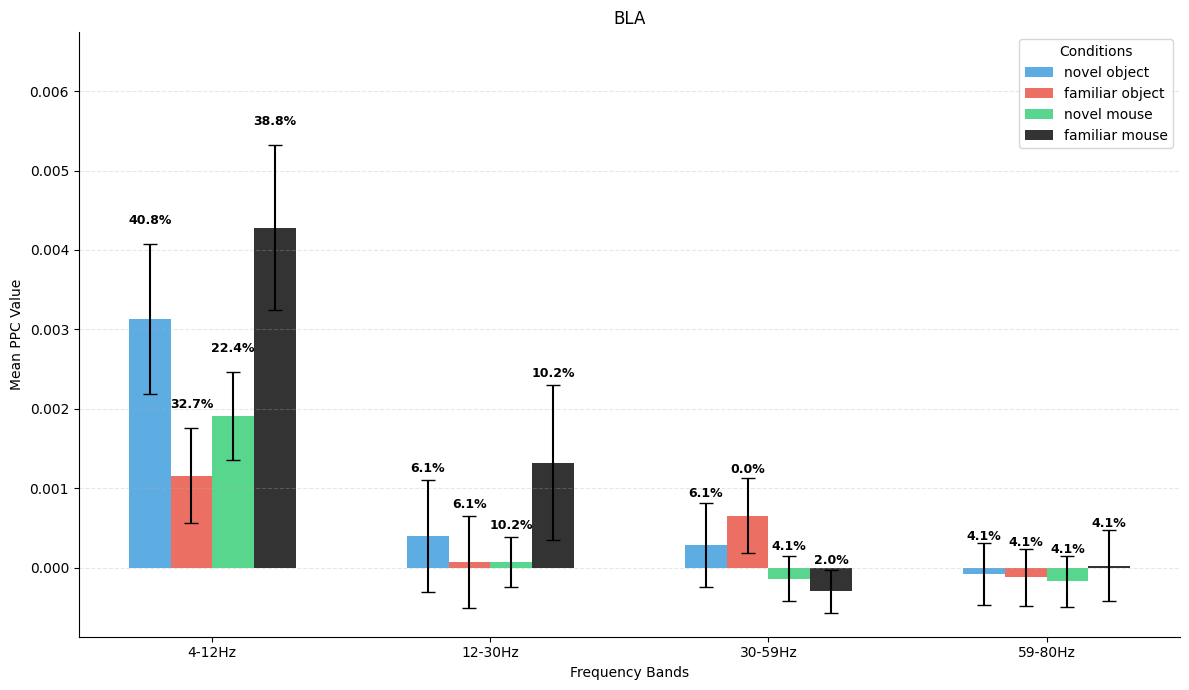

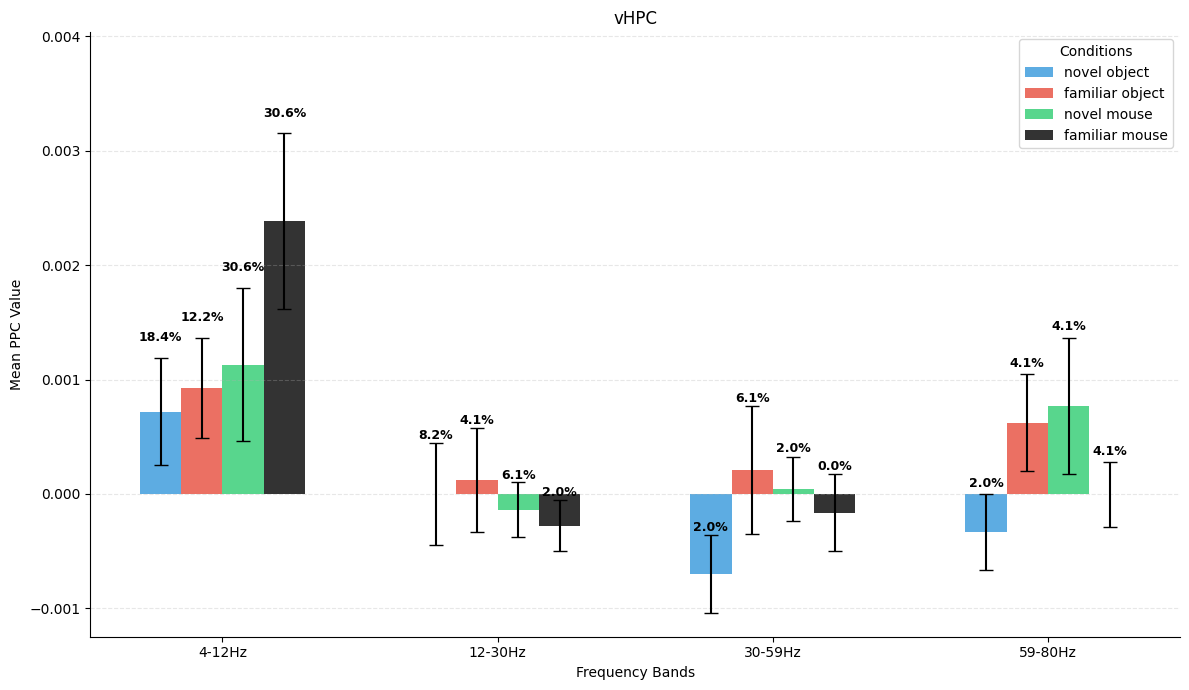

In [57]:
from scipy.stats import circmean
from astropy.stats import rayleightest
from scipy.stats import rayleigh
# Assuming we have these variables defined:
# cell_ts_off - spike timestamps
# Ph_OFF - a function that returns phases at given timestamps
# LFPinsoff - indices of LFP at spike times
# unit - current unit being analyzed
# PPCthetabla - array to store results
events = ['novel object', 'familiar object', 'novel mouse','familiar mouse']
freq_bands = ['4-12Hz', '12-30Hz', '30-59Hz', '59-80Hz']
for region in object_collection.brain_region_dict.keys():
    seg_ppc_dict = {}
    for event in events:
        ppc_dict = {}
        for freq_band in freq_bands:
            PPCs = []
            rayleighs = []
            for recording in object_spikes.recordings:
                for unit, spike_trains in recording.unit_spiketrains.items():
                    times = collection_seg_dict[recording.name][event]
                    values = rec_phase_dict[recording.name][region][freq_band]
                    try:
                        seg_spike_train = spike_trains[int(times[0]):int(times[1])]
                        seg_lfp_phase = values[int(times[0]):int(times[1])]
                    except (IndexError, ValueError):
                        seg_spike_train = spike_trains[int(times[0]):int(spike_trains.shape[0])]
                        seg_lfp_phase = values[int(times[0]):int(spike_trains.shape[0])]
                    if seg_spike_train.shape[0] != seg_lfp_phase.shape[0]:
                        shorter_len = min(seg_spike_train.shape[0], seg_lfp_phase.shape[0])
                        seg_spike_train = seg_spike_train[:shorter_len]
                        seg_lfp_phase = seg_lfp_phase[:shorter_len]
                                    
                    if sum(seg_spike_train) > 100:
                        # Extract spike phases
                        mask = seg_spike_train.astype(bool)
                        spike_phases = seg_lfp_phase[mask]
                

                        # Create matrices for all pairwise comparisons
                        temp1 = np.tile(spike_phases, (len(spike_phases), 1))
                        temp2 = temp1.T
                        # Calculate absolute circular distance between all pairs
                        
                        r = np.abs(np.angle(np.exp(1j*temp1)/np.exp(1j*temp2)))
                        # Create identity matrix with same dimensions
                        add_nans = np.eye(temp1.shape[0])
                        
                        # Replace ones with NaN
                        add_nans[add_nans == 1] = np.nan
                        
                        # Add NaNs to diagonal
                        r = r + add_nans
                        
                        # Calculate PPC
                        PPC = (np.pi - 2 * np.nanmean(np.nanmean(r))) / np.pi
                        p = rayleightest(spike_phases)
                        rayleighs.append(p)
                        # fig, ax = plt.subplots(1, 1)
                        # r = rayleigh.rvs(spike_phases)
                        # ax.hist(spike_phases, density=True, bins=20, histtype='stepfilled', alpha=0.2)
                        # ax.set_title(f'{unit}: PPC:{PPC}, p = {p}')
                        # plt.show()
                    else:
                        # Not enough spikes
                        rayleighs.append(np.nan)
                        PPC= np.nan
                    PPCs.append(PPC)
            ppc_array = np.array(PPCs)
            ppc_mean = np.nanmean(ppc_array)
            ppc_sem = sem(ppc_array, nan_policy='omit')
            percent_sig = np.sum(np.array(rayleighs) < .05)/len(rayleighs)
            ppc_dict[freq_band] = [ppc_mean, ppc_sem, percent_sig]
        seg_ppc_dict[event] = ppc_dict

    inner_keys = list(next(iter(seg_ppc_dict.values())).keys())
    outer_keys = list(seg_ppc_dict.keys())

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(12, 7))

    # Define bar properties
    bar_width = 0.15
    opacity = 0.8
    index = np.arange(len(inner_keys))
    colors = ['#3498db', '#e74c3c', '#2ecc71', 'black', 'orange']  # Blue, Red, Green

    # Plot grouped bars for each outer key (group)
    for i, outer_key in enumerate(outer_keys):
        # Extract data for this group
        group_data = seg_ppc_dict[outer_key]
        means = [group_data[key][0] for key in inner_keys]
        sems = [group_data[key][1] for key in inner_keys]
        percentages = [group_data[key][2]*100 for key in inner_keys]
        
        # Calculate position for this group's bars
        position = index + (i - len(outer_keys)/2 + 0.5) * bar_width
        
        # Plot the bars for this group
        bars = ax.bar(position, means, bar_width, 
                    yerr=sems, capsize=5,
                    alpha=opacity, color=colors[i], 
                    label=outer_key)
        
        # Add percentage labels above each bar
        for j, bar in enumerate(bars):
            height = bar.get_height()
            label_height = height + sems[j] + max([seg_ppc_dict[k][inner_keys[j]][0] 
                                                for k in outer_keys]) * 0.05
            ax.text(bar.get_x() + bar.get_width()/2., label_height,
                    f'{percentages[j]:.1f}%', 
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

    # Add labels, title and legend
    ax.set_xlabel('Frequency Bands')
    ax.set_ylabel('Mean PPC Value')
    ax.set_title(f'{region}')
    ax.set_xticks(index)
    ax.set_xticklabels(inner_keys)
    ax.legend(title='Conditions')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Add some extra space for the labels
    plt.ylim(top=plt.ylim()[1] * 1.2)

    # Add a grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

In [54]:
collection_seg_dict.keys()

dict_keys(['22_object_merged.rec', '23_object_merged.rec', '31_object_merged.rec', '32_object_merged.rec', '41_object_merged.rec', '44_object_merged.rec'])

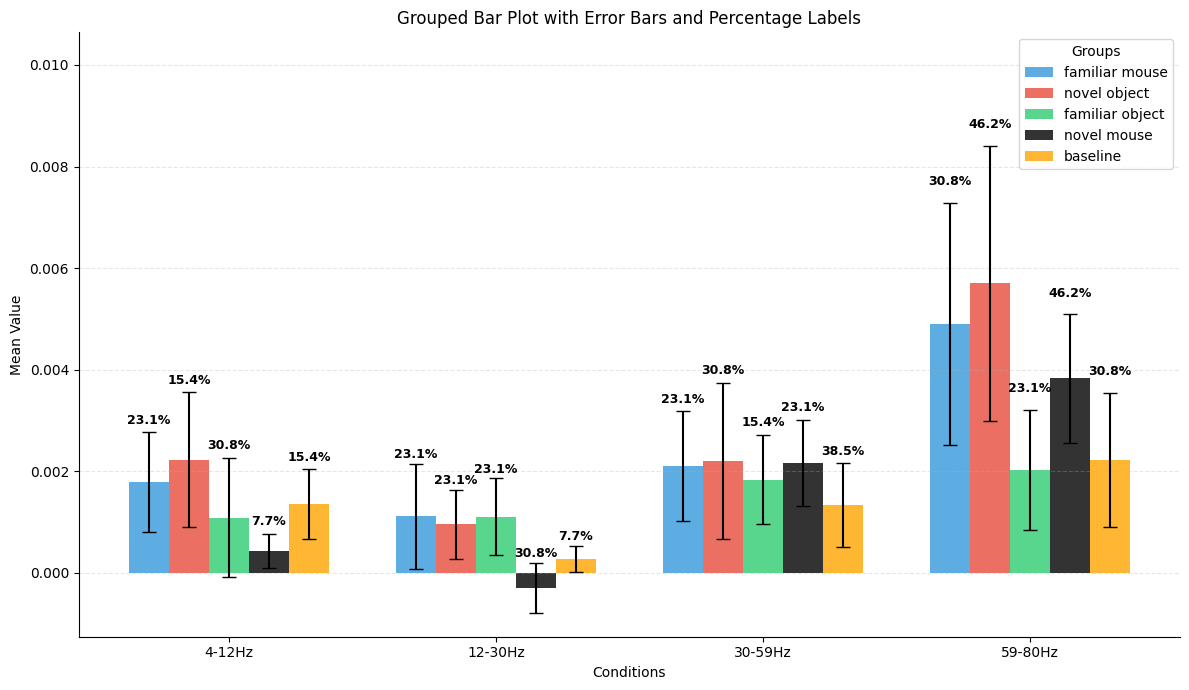

In [ ]:
print(len(PPCs), len(rayleighs))
for i in range(len(PPCs)):
    print(PPCs[i], rayleighs[i])

13 13
0.00010001557055035709 0.30439489119101787
0.0014620971946439352 0.009362697723260658
-0.001212173997876899 0.8506349147631085
0.0003639811330514989 0.26220792562612244
0.005508622714802042 0.00047982021998552865
-0.0011919109355202659 0.5994904016383147
0.0005415680387498231 0.06377965558886667
-1.284729979578931e-05 0.4224235194210383
nan nan
0.005425056172785061 0.14707965290884004
-7.881740185875484e-05 0.34628265172510225
nan nan
0.008706157024377797 0.04829748459949275


In [ ]:
temp1

array([[-1.51869277, -1.28610285, -1.05652665, ..., -2.70655095,
        -2.41646611, -2.3504281 ],
       [-1.51869277, -1.28610285, -1.05652665, ..., -2.70655095,
        -2.41646611, -2.3504281 ],
       [-1.51869277, -1.28610285, -1.05652665, ..., -2.70655095,
        -2.41646611, -2.3504281 ],
       ...,
       [-1.51869277, -1.28610285, -1.05652665, ..., -2.70655095,
        -2.41646611, -2.3504281 ],
       [-1.51869277, -1.28610285, -1.05652665, ..., -2.70655095,
        -2.41646611, -2.3504281 ],
       [-1.51869277, -1.28610285, -1.05652665, ..., -2.70655095,
        -2.41646611, -2.3504281 ]])

In [ ]:
temp2

array([[-1.51869277, -1.51869277, -1.51869277, ..., -1.51869277,
        -1.51869277, -1.51869277],
       [-1.28610285, -1.28610285, -1.28610285, ..., -1.28610285,
        -1.28610285, -1.28610285],
       [-1.05652665, -1.05652665, -1.05652665, ..., -1.05652665,
        -1.05652665, -1.05652665],
       ...,
       [-2.70655095, -2.70655095, -2.70655095, ..., -2.70655095,
        -2.70655095, -2.70655095],
       [-2.41646611, -2.41646611, -2.41646611, ..., -2.41646611,
        -2.41646611, -2.41646611],
       [-2.3504281 , -2.3504281 , -2.3504281 , ..., -2.3504281 ,
        -2.3504281 , -2.3504281 ]])

In [ ]:
np.tile(range(10), (10, 1))

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\event_extraction.py:115: RuntimeWarning: Mean of empty slice
  event_snippet = np.nanmean(event_snippet, axis=0)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\plotting.py:77: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(np.array(averages), axis=0)


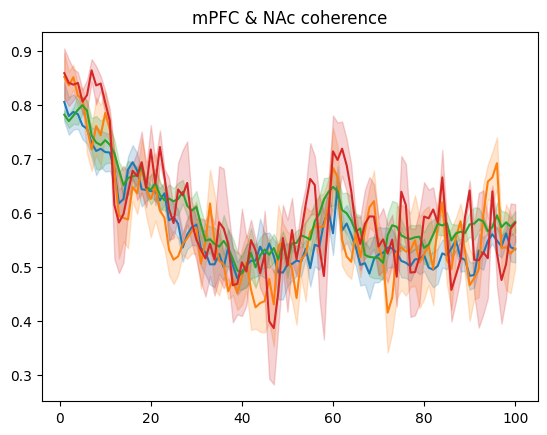

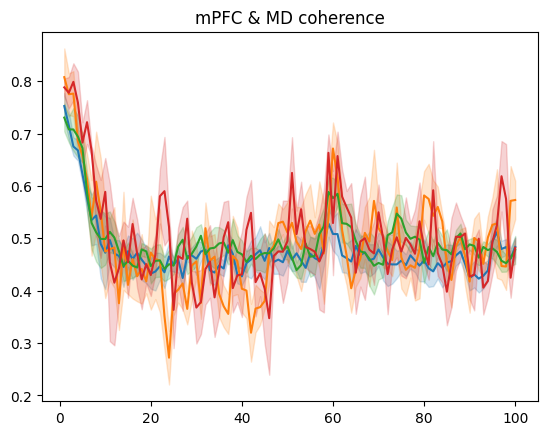

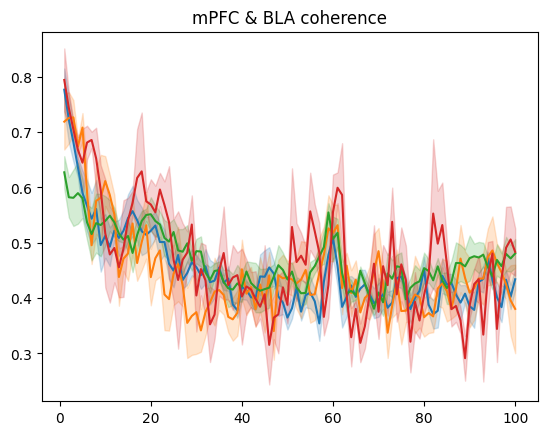

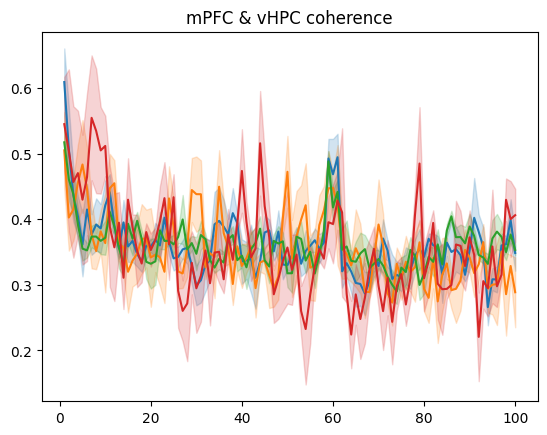

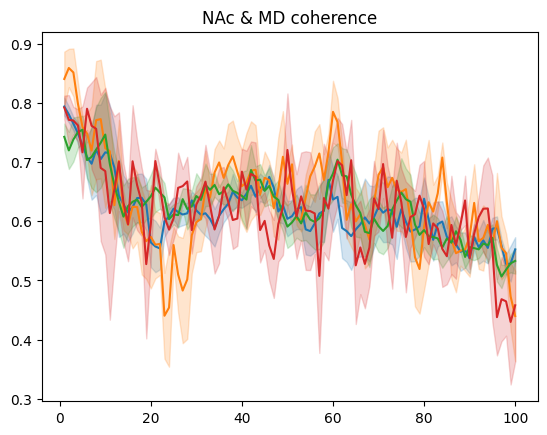

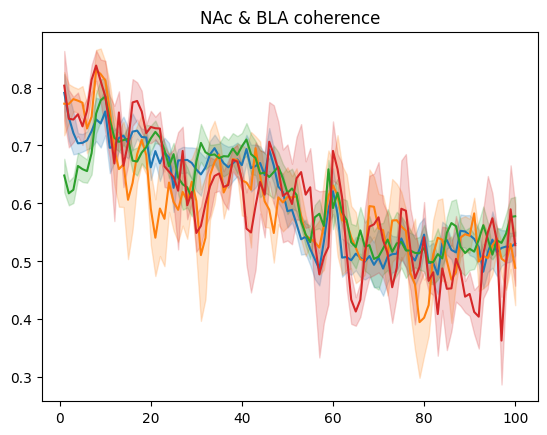

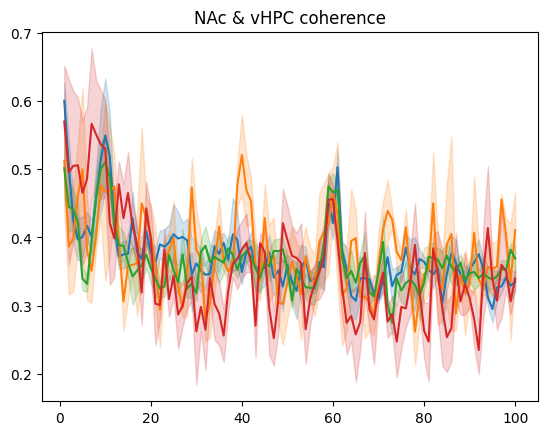

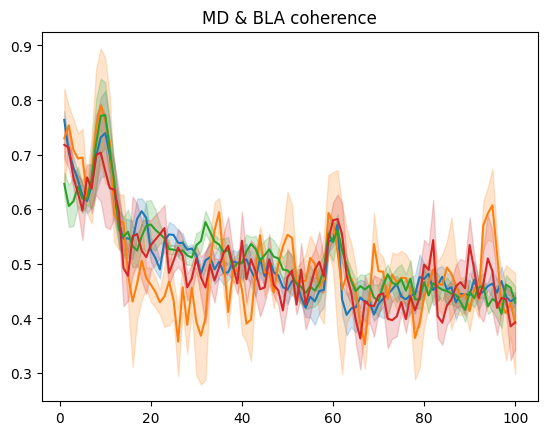

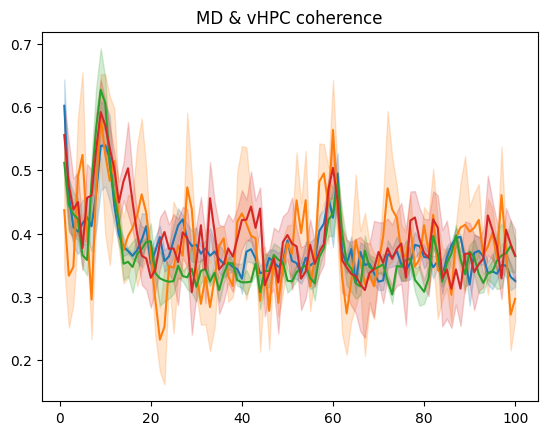

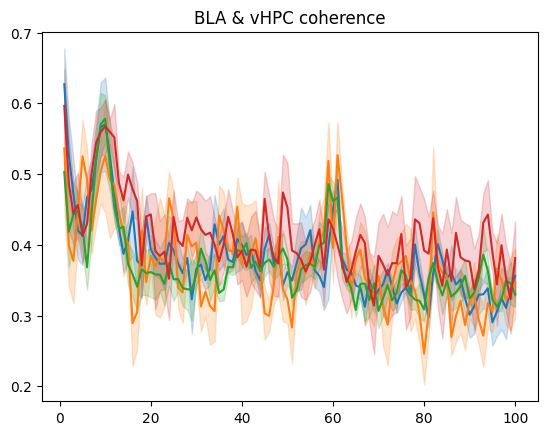

In [92]:
import lfp.lfp_analysis.event_extraction as ee
from importlib import reload
reload(lfplt)
reload(ee)
events = ['novel object', 'familiar object', 'novel mouse','familiar mouse']
coherence_average = ee.average_events(object_collection, events = events, mode = 'coherence')
lfplt.plot_coherence_spectrum(object_collection, coherence_average)